## Тестирование

Здесь будем тестировать решение многомерной задачи на собственные значения на
реальных тензорах. В данном случае будем искать собственные значения
Гамильтонианов — матриц, определяемых следующим образом

\begin{align*}
    &H = \sum_{i=1}^{d-1} \mathbf{S}_i\mathbf{S}_{i+1} =
    \sum_{i=1}^{d-1} \left( S_i^XS_{i+1}^X + S_i^YS_{i+1}^Y + S_i^ZS_{i+1}^Z \right)\\
    &S_i^{\{X, Y, Z\}} = \underbrace{I_2 \otimes \ldots \otimes \underbrace{S_{\{X, Y, Z\}}}_{i-\mathrm{th}} \otimes \ldots \otimes I_2}_{d\ \ \mathrm{factors}}
\end{align*}

Матрицы $S_{\{X, Y, Z\}}$ имеют вид

\begin{align*}
&S_X =
\frac{1}{2}
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
&&S_Y =
\frac{1}{2}
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
&&&S_Z =
\frac{1}{2}
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
\end{align*}

Первое что можно заметить, это то, что матрицы вида $S_Y$ содержат комплексные
элементы, что довольно грустно, т.к. с комплексной арифметикой работать не хочется.
Посмотрим на матрицу $S_i^YS_{i+1}^Y$ поближе:

\begin{align*}
    S_i^YS_{i+1}^Y = &(\underbrace{I_2 \otimes \ldots \otimes S_Y \otimes I_2 \otimes \ldots \otimes I_2}_{A} \otimes I_2)
    (\underbrace{I_2 \otimes \ldots \otimes I_2 \otimes S_Y \otimes \ldots \otimes I_2}_{B} \otimes I_2) =\\
    =& AB \otimes I_2 = \Diamond
\end{align*}

После некоторого количества таких развёрток, использования свойств кронекерова
произведения и слияния $\underbrace{I_2 \otimes \ldots \otimes I_2}_{i\ \ \mathrm{times}} = I_{2^i}$ получаем такую картину:

\begin{align*}
    \Diamond =& A'B' \otimes \widetilde{I} = (A'' \otimes I)(B'' \otimes S_Y) \otimes \widetilde{I} =
    A''B'' \otimes S_Y \otimes \widetilde{I} =\\
    =& (\widetilde{\widetilde{A}} \otimes S_Y)(\widetilde{\widetilde{B}} \otimes I)
    \otimes S_Y \otimes \widetilde{I} = \widetilde{\widetilde{A}}\widetilde{\widetilde{B}}
    \otimes S_Y \otimes S_Y \otimes \widetilde{I} =
    \widetilde{\widetilde{I}} \otimes S_Y \otimes S_Y \otimes \widetilde{I}
\end{align*}

Теперь посмотрим на матрицу $S_Y \otimes S_Y$:

\begin{align*}
    &S_Y \otimes S_Y = \frac{1}{2}
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
\otimes
\frac{1}{2}
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix} = \frac{1}{4}
\begin{pmatrix}
0 & 0 & 0 & -1\\
0 & 0 & 1 & 0\\
0 & -1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{pmatrix}
\end{align*}

О как здорово, получается матрица $S_i^YS_{i+1}^Y$ целиком вещественная,
несмотря на то, что множители комплексные. Значит можно придумать, как
считать Гамильтониан не прибегая к комплексной арифметике. На худой конец
можно его построить с использованием комплексной арифметики, а потом
комплексную часть у всех элементов обрезать, т.к. очевидно, что Гамильтониан
тоже целиком вещественный.

Теперь поближе посмотрим на выражение $S_i^XS_{i+1}^X + S_i^YS_{i+1}^Y$:

\begin{align*}
    S_i^XS_{i+1}^X + S_i^YS_{i+1}^Y =&
    \widetilde{\widetilde{I}} \otimes S_X \otimes S_X \otimes \widetilde{I}
    + \widetilde{\widetilde{I}} \otimes S_Y \otimes S_Y \otimes \widetilde{I} =\\
    =&
    \widetilde{\widetilde{I}} \otimes (S_X \otimes S_X + S_Y \otimes S_Y) \otimes \widetilde{I}\\
\end{align*}

\begin{align*}
    &S_X \otimes S_X = \frac{1}{4}
    \begin{pmatrix}
        0 & 0 & 0 & 1\\
        0 & 0 & 1 & 0\\
        0 & 1 & 0 & 0\\
        1 & 0 & 0 & 0\\
    \end{pmatrix}
    &&S_Y \otimes S_Y = \frac{1}{4}
    \begin{pmatrix}
        0 & 0 & 0 & -1\\
        0 & 0 & 1 & 0\\
        0 & -1 & 0 & 0\\
        1 & 0 & 0 & 0\\
    \end{pmatrix}
\end{align*}

\begin{align*}
    S_X \otimes S_X + S_Y \otimes S_Y =& \frac{1}{4}
    \begin{pmatrix}
        0 & 0 & 0 & 0\\
        0 & 0 & 2 & 0\\
        0 & 0 & 0 & 0\\
        2 & 0 & 0 & 0\\
    \end{pmatrix}
    =\frac{1}{2}
    \begin{pmatrix}
        0 & 0 & 0 & 0\\
        0 & 0 & 1 & 0\\
        0 & 0 & 0 & 0\\
        1 & 0 & 0 & 0\\
    \end{pmatrix} =\\\\
    =& \frac{1}{2}
    \begin{pmatrix}
    0 & E_3\\
    E_3 & 0
    \end{pmatrix} = \frac{1}{2} (I_2^{\bot} \otimes E_3)
\end{align*}

Где $E_3$ — третья матричная единица (третий базисный вектор из стандартного базиса
пространства $\mathbb{R}^{2\times2}$), $I_2^{\bot}$ — матрица циклической перестановки
порядка $2$. Теперь можно развернуть выражение в обратную
сторону и написать новое определение Гамильтониана:

\begin{align*}
    H =& \sum_{i=1}^{d-1} \left( S_i^XS_{i+1}^X + S_i^YS_{i+1}^Y + S_i^ZS_{i+1}^Z \right) =\\
    =& \sum_{i=1}^{d-1} \left( \frac{1}{2}\left(\widetilde{\widetilde{I}} \otimes I_2^{\bot} \otimes E_3 \otimes \widetilde{I} \right) + S_i^ZS_{i+1}^Z\right)
\end{align*}

Здесь $I_2^{\bot}$ стоит на $i$-ой позиции, а $E_3$ на $(i+1)$-ой.
Такое можно уже запрограммировать. Остаётся придумать, как представить Гамильтониан
в виде TT-тензора.

In [2]:
import jax
import jax.numpy as jnp
import numpy as np
from numpy import random
import ttax
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def tt_kron(a : ttax.base_class.TTMatrix, b : ttax.base_class.TTMatrix):
    a_cores = a.tt_cores
    if type(a_cores) is list:
        a_cores = jnp.array(a_cores)
    b_cores = b.tt_cores
    if type(b_cores) is list:
        b_cores = jnp.array(b_cores)
    return ttax.base_class.TTMatrix(jnp.concatenate((a_cores, b_cores)))

def apply_operator(operator_tt : ttax.base_class.TTMatrix, vec_tt : ttax.base_class.TT):
    return ttax.base_class.TT([
        jnp.einsum('abic,eig->aebcg', operator_tt.tt_cores[i], vec_tt.tt_cores[i]).reshape((
            operator_tt.tt_cores[i].shape[0] * vec_tt.tt_ranks[i], operator_tt.tt_cores[i].shape[1],
            operator_tt.tt_cores[i].shape[3] * vec_tt.tt_ranks[i + 1]), order="F",
        )
        for i in range(len(vec_tt.tt_cores))
    ])

jited_apply_operator = jax.jit(apply_operator)
jited_tt_kron = jax.jit(tt_kron)

In [4]:
E = ttax.base_class.TTMatrix(jnp.array([jnp.eye(2).reshape((1,2,2,1), order="F")]))
E2 = tt_kron(E, E)
sz = jnp.array([[1, 0], [0, -1]])
sz = 0.5 * ttax.base_class.TTMatrix(jnp.array([sz.reshape((1,2,2,1), order="F")]))
# print(ttax.full(tt_kron(sz, sz)))
print(ttax.full(E))

[[1. 0.]
 [0. 1.]]


In [5]:
def gen_SZ(S, i, d):
    E = ttax.base_class.TTMatrix(jnp.array([jnp.eye(2).reshape((1,2,2,1), order="F")]))
    res = S
    for j in range(i):
        res = jited_tt_kron(E, res)
    for j in range(d - i - 1):
        res = jited_tt_kron(res, E)
    return res

def gen_SX_plus_SY(E_3, I_bot, i, d):
    E = ttax.base_class.TTMatrix(jnp.array([jnp.eye(2).reshape((1,2,2,1), order="F")]))
    res = I_bot
    for j in range(i):
        res = jited_tt_kron(E, res)
    res = jited_tt_kron(res, E_3)
    for j in range(d - i - 2):
        res = jited_tt_kron(res, E)
    return res

def gen_Hamiltonian(d):
    sz = jnp.array([[1, 0], [0, -1]])
    sz = 0.5 * ttax.base_class.TTMatrix([sz.reshape((1,2,2,1), order="F")])
    E_3 = jnp.array([[0, 0], [1, 0]])
    E_3 = ttax.base_class.TTMatrix([E_3.reshape((1,2,2,1), order="F")])
    I_bot = jnp.array([[0, 1], [1, 0]])
    I_bot = ttax.base_class.TTMatrix([I_bot.reshape((1,2,2,1), order="F")])
    SSZ = [gen_SZ(sz, i, d) for i in range(d)]
    SSX_plus_SSY = [gen_SX_plus_SY(E_3, I_bot, i, d) for i in range(d)]
    zero_tensor = ttax.base_class.TTMatrix([jnp.zeros((1, 2, 2, 1))])
    H = gen_SZ(zero_tensor, 0, d)
    for i in range(d - 1):
        H += 0.5 * SSX_plus_SSY[i] + SSZ[i] @ SSZ[i + 1]
    return H

In [6]:
make_rayleigh = lambda A: lambda x: ttax.flat_inner(x, A(x))
norm = lambda x: jnp.sqrt(ttax.flat_inner(ttax.orthogonalize(x), ttax.orthogonalize(x)))
fused_norm = jax.jit(norm)
residual = lambda A, x, eig: fused_norm(A(x) + (-eig) * x) / fused_norm(A(x))

def retraction(T, rk):
    res = ttax.round(T, max_tt_rank=rk)
    res = ttax.orthogonalize(res * (1.0/fused_norm(res)))
    # res = res * (1.0/fused_norm(res))
    return res

a = []

def armijo_backtracking(init, grad, rk, mul, beta, func, x):
    alpha = init
    iters = 0
    optimal_x = retraction(x + (-alpha) * grad, rk)
    while func(x) - func(optimal_x) < mul * alpha * fused_norm(grad) ** 2:
        alpha *= beta
        iters += 1
        optimal_x = retraction(x + (-alpha) * grad, rk)
        if iters > 40:
            break
    a.append(iters)
    return optimal_x

def riemanGD(A, init, tol, rk, max_iter = None, debug = False):
    rayleigh = make_rayleigh(A)
    # fused_rayleigh = ttax.fuse(rayleigh)
    rieman_grad = ttax.autodiff.grad(rayleigh)
    x = retraction(init, rk)
    residuals = [residual(A, x, rayleigh(x))]
    iters = 0
    if debug == True:
        print("№\tresidual")
    while residual(A, x, rayleigh(x)) > tol:
        rieman_x = rieman_grad(x)
        # optimum = ttax.flat_inner(x, A(rieman_x)) / ttax.flat_inner(rieman_x, A(rieman_x))
        if len(residuals) >= 2 and (residuals[-1] / residuals[-2] < 0.99):
            # print("BOOM", residuals[-1] / residuals[-2])
            x = retraction(x + (-250) * rieman_x, rk)
        else:
            x = armijo_backtracking(1, rieman_x, rk, 1E-4, 0.5, rayleigh, x)
            # x = armijo_backtracking(optimum, rieman_x, rk, 1E-4, 0.5, rayleigh, x)
        iters += 1
        residuals.append(residual(A, x, rayleigh(x)))
        if debug == True:
            print("{}\t{}".format(iters, residual(A, x, rayleigh(x))))
        if (max_iter is not None and iters >= max_iter):
            break

    return x, residuals

In [7]:
H = gen_Hamiltonian(2)
print(ttax.full(H))

[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.   -0.25  0.  ]
 [ 0.5   0.    0.    0.25]]


По крайней мере не сложно проверить, что это правильный ответ.

In [16]:
d = 30
rk = 1
H = gen_Hamiltonian(d)
n = H.raw_tensor_shape[0]
H_round = ttax.round(H, 1)
operator = lambda x: jited_apply_operator(H, x)
init = ttax.random.tensor(jax.random.PRNGKey(41), n, tt_rank=rk)
print(d, rk, len(n))
# print(H_round.tt_ranks, init.tt_ranks)

30 1 30


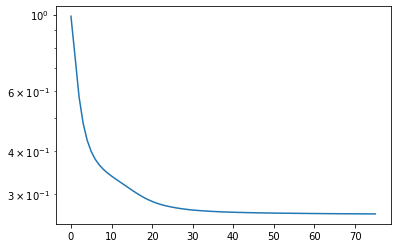

In [17]:
vec_rk1, residuals_rk1 = riemanGD(operator, init, 1E-2, rk, 75)
plt.semilogy()
plt.show(plt.plot(residuals_rk1))

In [18]:
print(residuals_rk1[-1], make_rayleigh(operator)(vec_rk1))

0.26329955 -6.939792


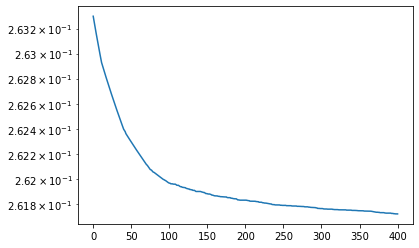

In [19]:
vec2_rk1, residuals2_rk1 = riemanGD(operator, vec_rk1, 1E-2, rk, 400)
plt.semilogy()
plt.show(plt.plot(residuals2_rk1))

In [20]:
print(residuals2_rk1[-1], make_rayleigh(operator)(vec2_rk1))

0.26172206 -6.9983635


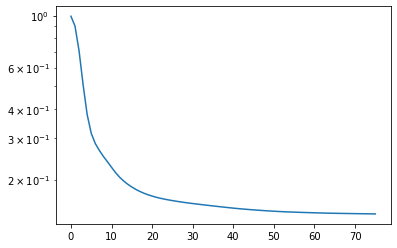

In [23]:
rk = 2
init = ttax.random.tensor(jax.random.PRNGKey(41), n, tt_rank=rk)
vec_rk2, residuals_rk2 = riemanGD(operator, init, 1E-2, rk, 75)
plt.semilogy()
plt.show(plt.plot(residuals_rk2))

In [24]:
print(residuals_rk2[-1], make_rayleigh(operator)(vec_rk2))

0.14263558 -8.699251


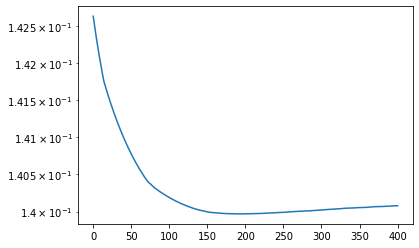

In [25]:
vec2_rk2, residuals2_rk2 = riemanGD(operator, vec_rk2, 1E-2, rk, 400)
plt.semilogy()
plt.show(plt.plot(residuals2_rk2))

In [26]:
print(residuals2_rk2[-1], make_rayleigh(operator)(vec2_rk2))

0.14007996 -8.875069
